## Authors:
•	דולב פרץ -208901504
<br>
•	שי ויצמן-315618918
<br>
•	ינון חדד-315451542





In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')


In [2]:
def showData(trainP, testP, model, discreteFeatures = ['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'class']):
    train = pd.read_csv(trainP)
    test = pd.read_csv(testP)
    number = LabelEncoder()

    for i in discreteFeatures:
        train[i] = number.fit_transform(train[i])
    number = LabelEncoder()
    for i in discreteFeatures:
        test[i] = number.fit_transform(test[i])
        
    features = [i for i in train.columns[:-1]]
    target_train=train.pop('class')
    
    model.fit(train, target_train)
    
    plot_confusion_matrix(model, train, target_train)  
    plt.title("Confusion Matrix on the train")
    plt.show() 
    
    target_test=test.pop('class')
    
    plot_confusion_matrix(model,test, target_test)  
    plt.title("Confusion Matrix on the test")
    plt.show() 
    pred = model.predict(test)
    accuracy = accuracy_score(target_test, pred)*100
    precision = precision_score(target_test, pred)*100
    recall = recall_score(target_test, pred)*100
    x = np.array(['accuracy', 'precision', 'recall'])
    y = np.array([accuracy, precision, recall])

    plt.title("Evaluation indices")
    plt.xlabel('\nAccuracy: {} %, Precision: {} %, Recall: {} %'.format(int(accuracy), int(precision), int(recall)))
    plt.bar(x, y)
    plt.show()
    

In [3]:
def showTreeData(trainP, testP, resultTree):
    train = pd.read_csv(trainP)
    test = pd.read_csv(testP)
    truePositive = trueNegative = falseNegative = falsePositive = 0
    counterYesGuess = counterNoGuess = 0

    for index, row in test.iterrows():
        runTree = resultTree
        while (type(runTree) == type(resultTree)):
            runTree = runTree.getChiled(row[runTree.getDivBy()])

        if runTree == 'yes':
            counterYesGuess += 1
        else:
            counterNoGuess += 1

        if row['class'] == 'yes' and runTree == 'yes':
            truePositive += 1
        elif row['class'] == 'no' and runTree == 'no':
            trueNegative += 1
        elif row['class'] == 'yes' and runTree == 'no':
            falseNegative += 1
        elif row['class'] == 'no' and runTree == 'yes':
            falsePositive += 1

    accuracy = ((trueNegative + truePositive) / (counterYesGuess + counterNoGuess)) * 100 if (counterYesGuess + counterNoGuess) != 0 else 0
    precision = (truePositive / (truePositive + falsePositive)) * 100 if (truePositive + falsePositive) != 0 else 0
    recall = (truePositive / (truePositive + falseNegative)) * 100 if (truePositive + falseNegative) != 0 else 0

    x = np.array(['accuracy', 'precision', 'recall'])
    y = np.array([accuracy, precision, recall])

    plt.title("Evaluation indices")
    plt.xlabel('\nAccuracy: {} %, Precision: {} %, Recall: {} %'.format(int(accuracy), int(precision), int(recall)))
    plt.bar(x, y)
    plt.show()
    
    x = PrettyTable()

    x.field_names = ["", "Negative", "Positive"]

    x.add_row(["No", str(trueNegative), str(falsePositive)])
    x.add_row(["Yes", str(falseNegative), str(truePositive)])
    print(x)

In [4]:
def showNaiveBaseData(trainP, testP, result):
    
    def getBinPercent(title, value, yesOrNo): # get feature name, specific value and "yes" / "no" , returns the probability according resultYes&resultNo dictionaries.
        try:
            return resultYes[title][value] if yesOrNo == "yes" else resultNo[title][value]
        except:
            return 1.0
        
    resultYes = result['Yes']
    resultNo = result['No']
    train = pd.read_csv(trainP)
    test = pd.read_csv(testP)
    
    totalNo = (train["class"] == 'no').sum()
    totalYes = (train["class"] == 'yes').sum()
    R = "yes" if totalYes > totalNo else "no"
    
    truePositive = trueNegative = falseNegative = falsePositive = 0
    counterYesGuess = counterNoGuess = 0
    
    for index, row in test.iterrows():
        sumYes = sumNo = 1
        for title in test.columns:
            if title != "class":
                sumYes *= getBinPercent(title, row[title], "yes")
                sumNo *= getBinPercent(title, row[title], "no")
        sumYes = sumYes * totalYes/(totalYes+totalNo)
        sumNo = sumNo * totalNo/(totalYes+totalNo)

        if sumYes > sumNo:
            counterYesGuess += 1
        else:
            counterNoGuess += 1

        if (sumYes > sumNo and row["class"] == "yes") or (sumYes == sumNo and row["class"] == "yes" and R == 'yes'):
            truePositive += 1
        elif (sumNo > sumYes and row["class"] == "no") or (sumYes == sumNo and row["class"] == "no" and R == 'no'):
            trueNegative += 1
        elif (sumNo > sumYes and row["class"] == "yes") or (sumYes == sumNo and row["class"] == "yes" and R == 'no'):
            falseNegative += 1
        elif (sumYes > sumNo and row["class"] == "no") or (sumYes == sumNo and row["class"] == "no" and R == 'yes'):
            falsePositive +=1

    accuracy = ((trueNegative + truePositive)/(counterYesGuess + counterNoGuess)) * 100 if (counterYesGuess + counterNoGuess) != 0 else 0
    precision = (truePositive/(truePositive + falsePositive))*100 if (truePositive + falsePositive) != 0 else 0
    recall = (truePositive/(truePositive + falseNegative))*100 if (truePositive + falseNegative) != 0 else 0
    
    x = np.array(['accuracy', 'precision', 'recall'])
    y = np.array([accuracy, precision, recall])

    plt.title("Evaluation indices")
    plt.xlabel('\nAccuracy: {} %, Precision: {} %, Recall: {} %'.format(int(accuracy), int(precision), int(recall)))
    plt.bar(x, y)
    plt.show()
    
    x = PrettyTable()

    x.field_names = ["", "Negative", "Positive"]

    x.add_row(["No", str(trueNegative), str(falsePositive)])
    x.add_row(["Yes", str(falseNegative), str(truePositive)])
    print(x)

In [5]:
def showKmeansData(trainP, testP, model, discreteFeatures = ['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'class']):
    train = pd.read_csv(trainP)
    test = pd.read_csv(testP)
    number = LabelEncoder()
    for i in discreteFeatures:
        train[i] = number.fit_transform(train[i])

    for i in discreteFeatures:
        test[i] = number.fit_transform(test[i])

    target_train=train.pop('class')
    target_test=test.pop('class')

    model.fit(train, target_train)

    pred = model.predict(test)
    accuracy = accuracy_score(target_test, pred)*100
    precision =precision_score(target_test, pred, average='weighted')*100
    recall = recall_score(target_test, pred, average='weighted', labels=np.unique(pred), zero_division=True)*100

    x = np.array(['accuracy', 'precision', 'recall'])
    y = np.array([accuracy, precision, recall])

    plt.title("Evaluation indices")
    plt.xlabel('\nAccuracy: {} %, Precision: {} %, Recall: {} %'.format(int(accuracy), int(precision), int(recall)))
    plt.bar(x, y)
    plt.show()

# Table of context
---

- ## Experiments
    - ### Normalization
        - #### Normalization & Complete missing values by all data
            - KNN
            - K-means
        - #### Normalization & complete missing values by Classification column
            - KNN
            - K-means
    - ### Discretization
        - #### Complete Missing values by - All Data
            - ##### Our Equal width 
                - Our naive bayes
                - Implemented naive bayes
                - Our Decision Tree
                - Implemented Decision Tree
                - KNN
                - K-means
            - ##### Our Equal frequency 
                - Our naive bayes
                - Implemented naive bayes
                - Our Decision Tree
                - Implemented Decision Tree
                - KNN
                - K-means
            - ##### Implemented Equal width 
                - Our naive bayes
                - Implemented naive bayes
                - Our Decision Tree
                - Implemented Decision Tree
                - KNN
                - K-means
            - ##### Implemented Equal frequency 
                - Our naive bayes
                - Implemented naive bayes
                - Our Decision Tree
                - Implemented Decision Tree
                - KNN
                - K-means
       - #### Complete Missing values by - Classification Column
            - ##### Our Equal width 
                - Our naive bayes
                - Implemented naive bayes
                - Our Decision Tree
                - Implemented Decision Tree
                - KNN
                - K-means
            - ##### Our Equal frequency 
                - Our naive bayes
                - Implemented naive bayes
                - Our Decision Tree
                - Implemented Decision Tree
                - KNN
                - K-means
            - ##### Implemented Equal width 
                - Our naive bayes
                - Implemented naive bayes
                - Our Decision Tree
                - Implemented Decision Tree
                - KNN
                - K-means
            - ##### Implemented Equal frequency 
                - Our naive bayes
                - Implemented naive bayes
                - Our Decision Tree
                - Implemented Decision Tree
                - KNN
                - K-means
        - #### ניסויים נוספים
        
       

# Expirements
---

---

## Normalization

## Normalization & Complete missing values by all data

---

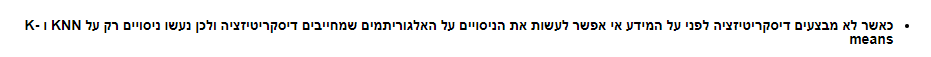

#### KNN
---

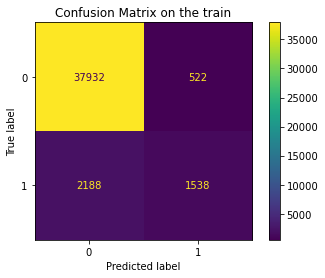

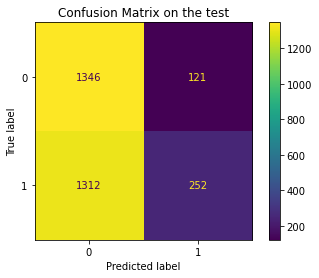

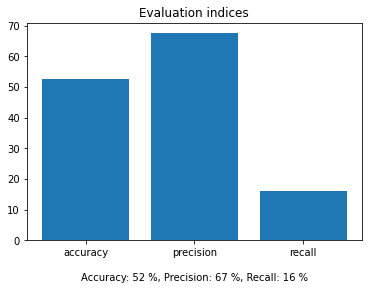

In [6]:
infile = open('normalization/all data/KNN','rb')
showData('normalization/all data/train_clean.csv', 'normalization/all data/test_clean.csv', pickle.load(infile))
infile.close()

#### Kmeans

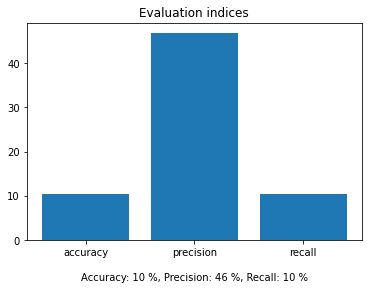

In [7]:
infile = open('normalization/all data/Kmeans','rb')
showKmeansData('normalization/all data/train_clean.csv', 'normalization/all data/test_clean.csv', pickle.load(infile))
infile.close()

## Normalization & complete missing values by Classification column
---

#### KNN

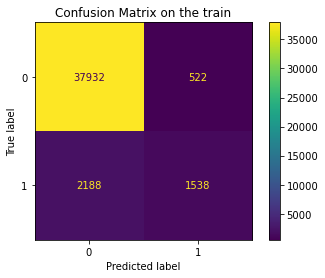

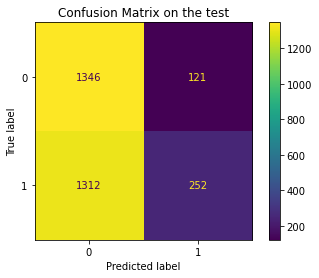

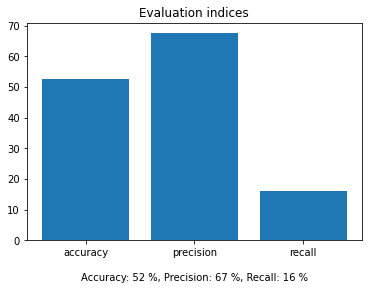

In [8]:
infile = open('normalization/classification/KNN','rb')
showData('normalization/classification/train_clean.csv', 'normalization/all data/test_clean.csv', pickle.load(infile))
infile.close()

#### K-means

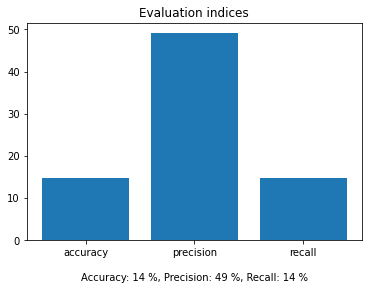

In [9]:
infile = open('normalization/classification/Kmeans','rb')
showKmeansData('normalization/classification/train_clean.csv', 'normalization/all data/test_clean.csv', pickle.load(infile))
infile.close()

## Discretization 

## Complete Missing values by - All Data

### Our Equal Width - 5 bins 
---

#### Our naive bayes

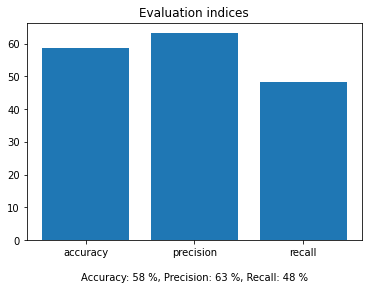

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1028   |   439    |
| Yes |   809    |   755    |
+-----+----------+----------+


In [10]:
infile = open('discretization/all data/our equal width/our naive bayes','rb')
showNaiveBaseData('discretization/all data/our equal width/train_clean.csv', 'discretization/all data/our equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented naive bayes

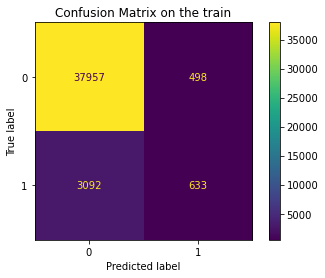

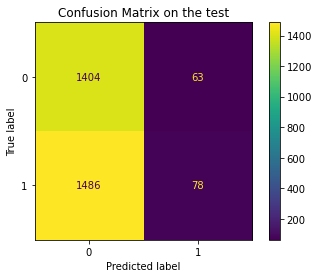

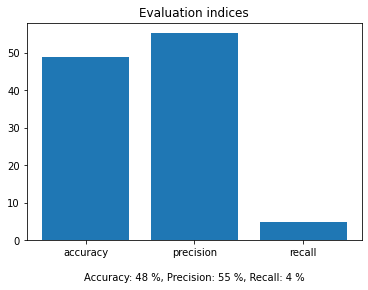

In [11]:
infile = open('discretization/all data/our equal width/implemented naive bayes','rb')
showData('discretization/all data/our equal width/train_clean.csv', 'discretization/all data/our equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Our Decision Tree

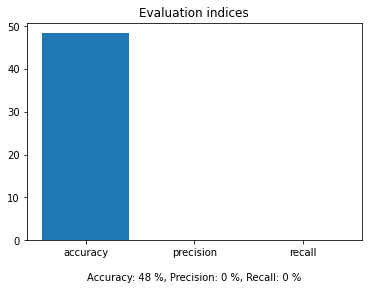

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1467   |    0     |
| Yes |   1564   |    0     |
+-----+----------+----------+


In [12]:
infile = open('discretization/all data/our equal width/our decision tree','rb')
x=pickle.load(infile)
infile.close()
showTreeData('discretization/all data/our equal width/train_clean.csv', 'discretization/all data/our equal width/test_clean.csv', x)


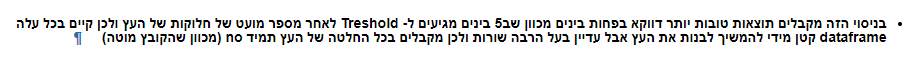

#### Implemented Decision Tree

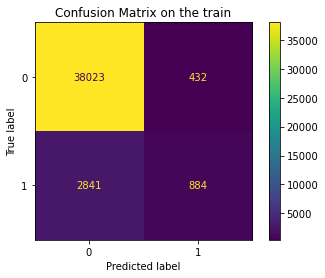

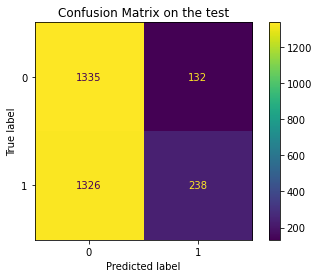

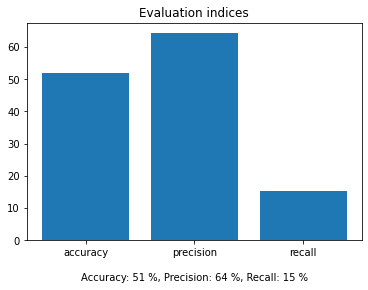

In [13]:
infile = open('discretization/all data/our equal width/implemented decision tree','rb')
showData('discretization/all data/our equal width/train_clean.csv', 'discretization/all data/our equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### KNN


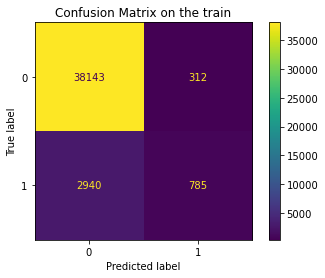

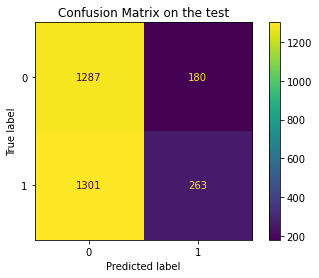

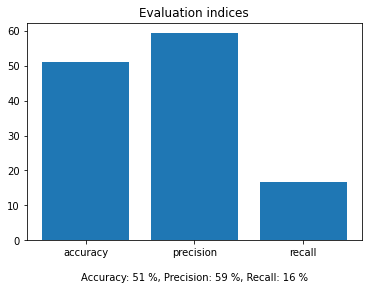

In [14]:
infile = open('discretization/all data/our equal width/KNN','rb')
showData('discretization/all data/our equal width/train_clean.csv', 'discretization/all data/our equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Kmeans

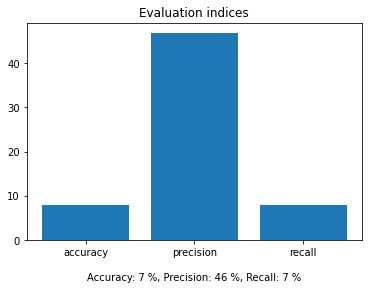

In [15]:
infile = open('discretization/all data/our equal width/Kmeans','rb')
showKmeansData('discretization/all data/our equal width/train_clean.csv', 'discretization/all data/our equal width/test_clean.csv', pickle.load(infile))
infile.close()

### Our Equal Frequency - 5 bins
---

#### Our naive bayes

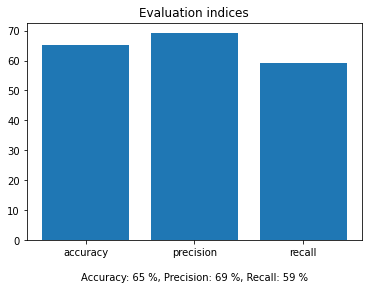

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1054   |   413    |
| Yes |   638    |   926    |
+-----+----------+----------+


In [16]:
infile = open('discretization/all data/our equal frequency/our naive bayes','rb')
showNaiveBaseData('discretization/all data/our equal frequency/train_clean.csv', 'discretization/all data/our equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented naive bayes

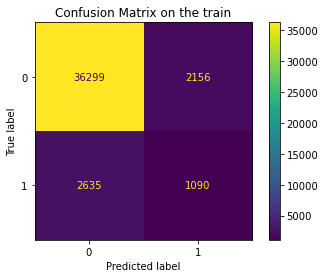

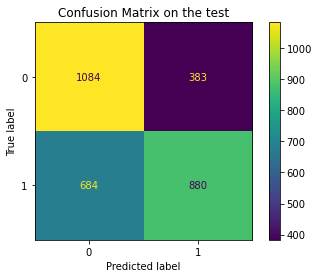

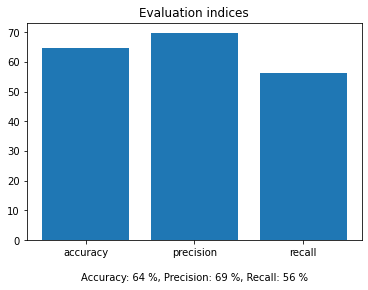

In [17]:
infile = open('discretization/all data/our equal frequency/implemented naive bayes','rb')
showData('discretization/all data/our equal frequency/train_clean.csv', 'discretization/all data/our equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Our Decision Tree

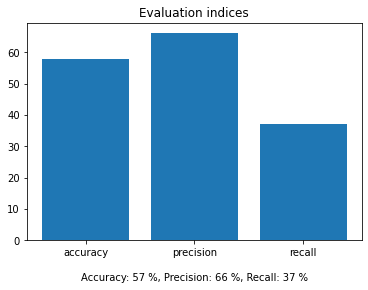

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1170   |   297    |
| Yes |   985    |   579    |
+-----+----------+----------+


In [18]:
infile = open('discretization/all data/our equal frequency/our decision tree','rb')
showTreeData('discretization/all data/our equal frequency/train_clean.csv', 'discretization/all data/our equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented Decision Tree

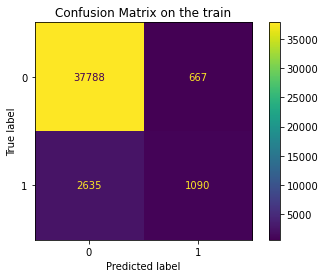

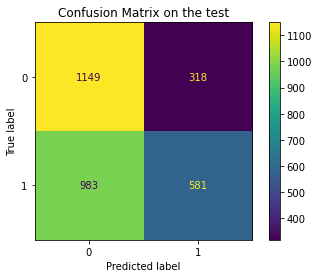

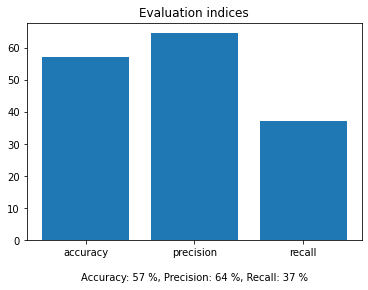

In [19]:
infile = open('discretization/all data/our equal frequency/implemented decision tree','rb')
showData('discretization/all data/our equal frequency/train_clean.csv', 'discretization/all data/our equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### KNN

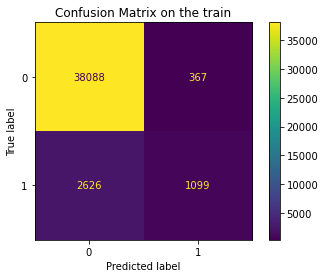

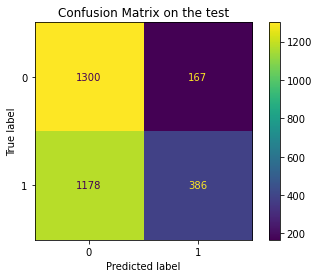

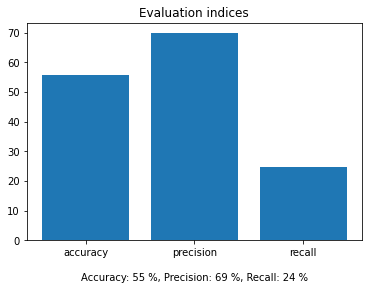

In [20]:
infile = open('discretization/all data/our equal frequency/KNN','rb')

showData('discretization/all data/our equal frequency/train_clean.csv', 'discretization/all data/our equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Kmeans

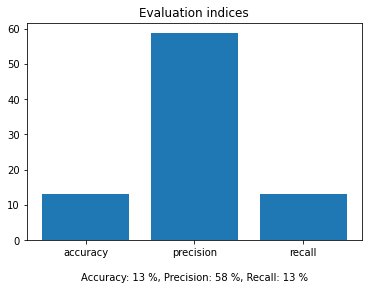

In [21]:
infile = open('discretization/all data/our equal frequency/Kmeans','rb')
showKmeansData('discretization/all data/our equal frequency/train_clean.csv', 'discretization/all data/our equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

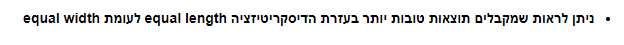

### Implemented Equal Width - 5 bins
---

#### Our naive bayes

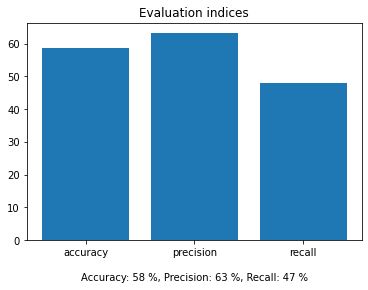

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1031   |   436    |
| Yes |   814    |   750    |
+-----+----------+----------+


In [22]:
infile = open('discretization/all data/implemented equal width/our naive bayes','rb')
showNaiveBaseData('discretization/all data/implemented equal width/train_clean.csv', 'discretization/all data/implemented equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented naive bayes

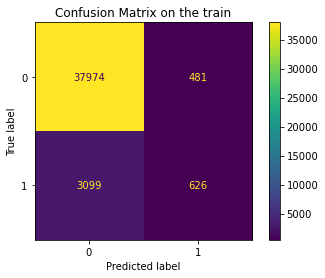

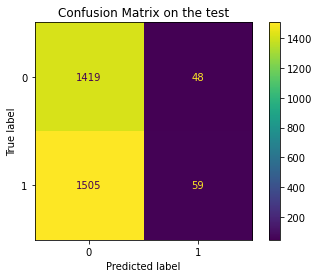

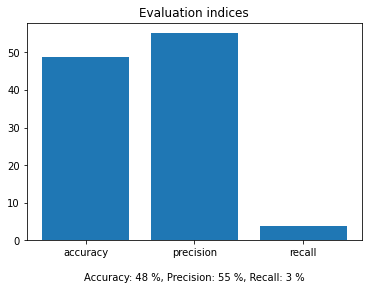

In [23]:
infile = open('discretization/all data/implemented equal width/implemented naive bayes','rb')
showData('discretization/all data/implemented equal width/train_clean.csv', 'discretization/all data/implemented equal width/test_clean.csv', pickle.load(infile))
infile.close()

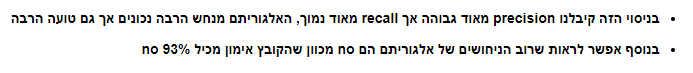

#### Our Decision Tree

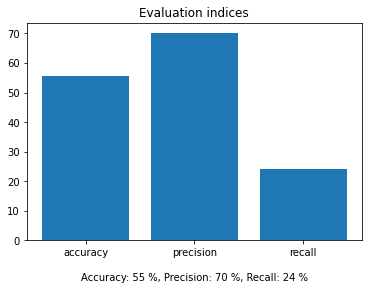

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1306   |   161    |
| Yes |   1186   |   378    |
+-----+----------+----------+


In [24]:
infile = open('discretization/all data/implemented equal width/our decision tree','rb')
showTreeData('discretization/all data/implemented equal width/train_clean.csv', 'discretization/all data/implemented equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented Decision Tree

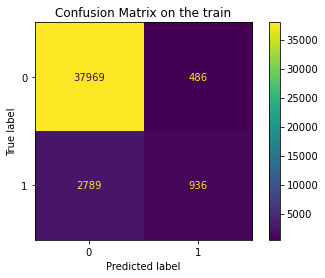

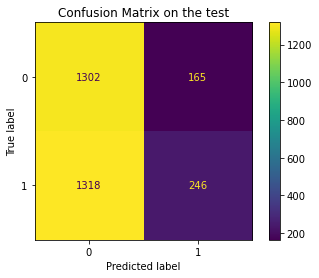

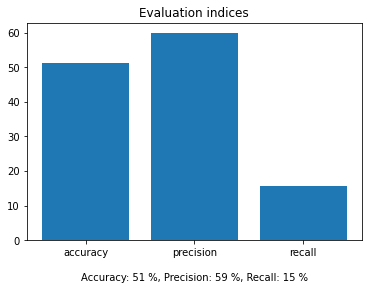

In [25]:
infile = open('discretization/all data/implemented equal width/implemented decision tree','rb')
showData('discretization/all data/implemented equal width/train_clean.csv', 'discretization/all data/implemented equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### KNN

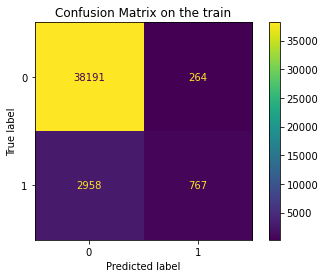

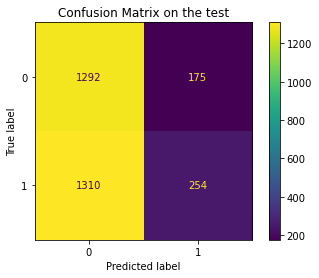

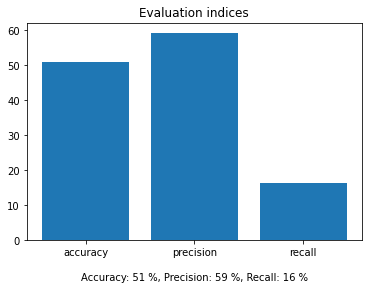

In [26]:
infile = open('discretization/all data/implemented equal width/KNN','rb')
showData('discretization/all data/implemented equal width/train_clean.csv', 'discretization/all data/implemented equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Kmeans

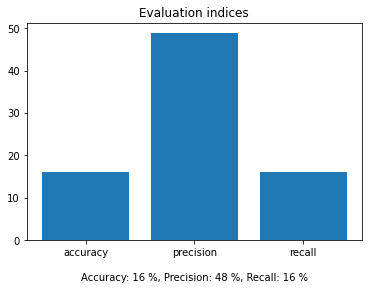

In [27]:
infile = open('discretization/all data/implemented equal width/Kmeans','rb')
showKmeansData('discretization/all data/implemented equal width/train_clean.csv', 'discretization/all data/implemented equal width/test_clean.csv', pickle.load(infile))
infile.close()

### Implemented Equal Frequency - 5 bins

#### Our naive bayes

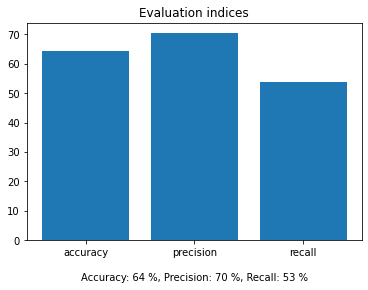

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1115   |   352    |
| Yes |   724    |   840    |
+-----+----------+----------+


In [28]:
infile = open('discretization/all data/implemented equal frequency/our naive bayes','rb')
showNaiveBaseData('discretization/all data/implemented equal frequency/train_clean.csv', 'discretization/all data/implemented equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented naive bayes

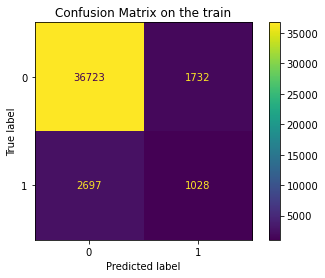

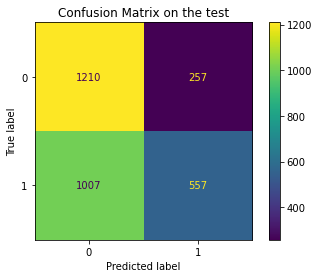

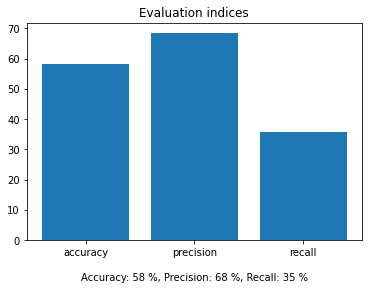

In [29]:
infile = open('discretization/all data/implemented equal frequency/implemented naive bayes','rb')
showData('discretization/all data/implemented equal frequency/train_clean.csv', 'discretization/all data/implemented equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Our Decision Tree

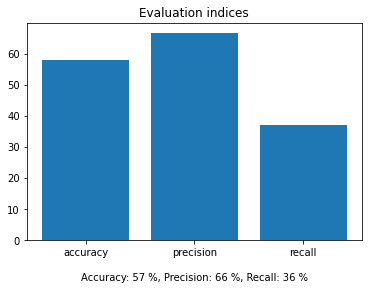

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1177   |   290    |
| Yes |   986    |   578    |
+-----+----------+----------+


In [30]:
infile = open('discretization/all data/implemented equal frequency/our decision tree','rb')
showTreeData('discretization/all data/implemented equal frequency/train_clean.csv', 'discretization/all data/implemented equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented Decision Tree

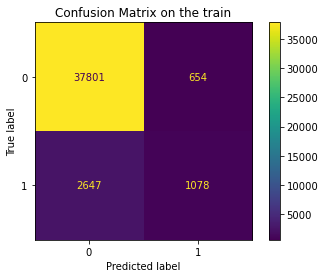

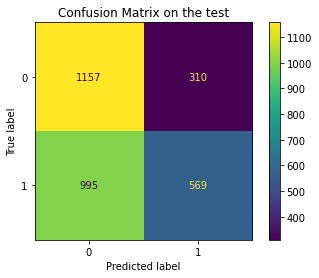

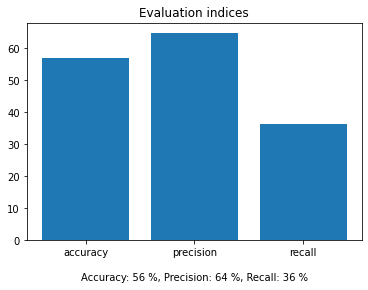

In [31]:
infile = open('discretization/all data/implemented equal frequency/implemented decision tree','rb')
showData('discretization/all data/implemented equal frequency/train_clean.csv', 'discretization/all data/implemented equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### KNN

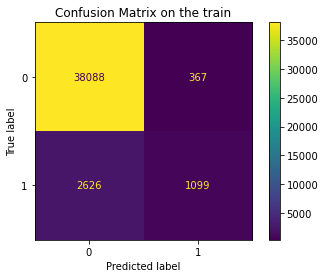

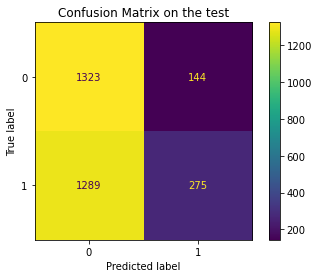

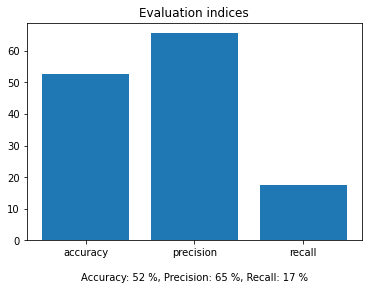

In [32]:
infile = open('discretization/all data/implemented equal frequency/KNN','rb')
showData('discretization/all data/implemented equal frequency/train_clean.csv', 'discretization/all data/implemented equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Kmeans

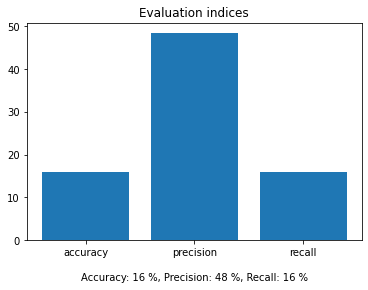

In [33]:
infile = open('discretization/all data/implemented equal frequency/Kmeans','rb')
showKmeansData('discretization/all data/implemented equal frequency/train_clean.csv', 'discretization/all data/implemented equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

### Our Entropy Based Discretization  - 2 bins

#### Our Naive Bayse

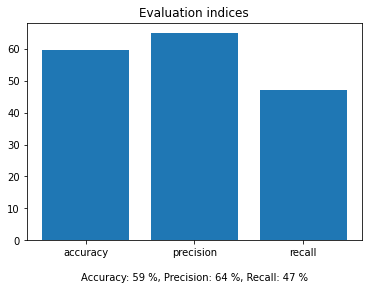

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1069   |   398    |
| Yes |   827    |   737    |
+-----+----------+----------+


In [34]:
infile = open('discretization/all data/entropy/our naive bayes','rb')
showNaiveBaseData('discretization/all data/entropy/train_clean.csv', 'discretization/all data/entropy/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented Naive Bayse

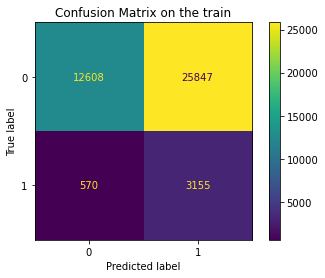

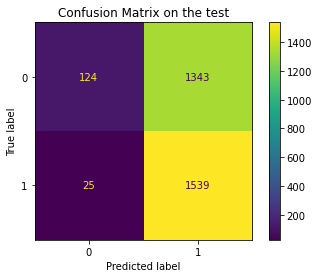

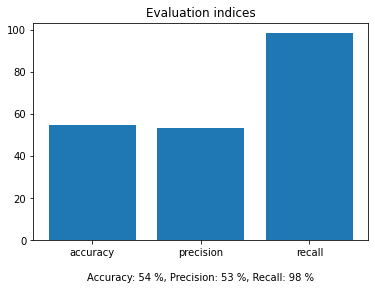

In [35]:
infile = open('discretization/all data/entropy/Implemented naive bayes','rb')
showData('discretization/all data/entropy/train_clean.csv', 'discretization/all data/entropy/test_clean.csv', pickle.load(infile))
infile.close()

#### Our Decision Tree

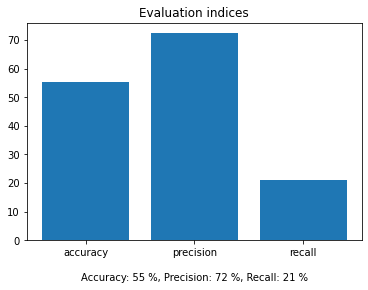

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1341   |   126    |
| Yes |   1233   |   331    |
+-----+----------+----------+


In [36]:
infile = open('discretization/all data/entropy/our decision tree','rb')
x=pickle.load(infile)
infile.close()
showTreeData('discretization/all data/entropy/train_clean.csv', 'discretization/all data/entropy/test_clean.csv', x)


#### Implemented Decision Tree

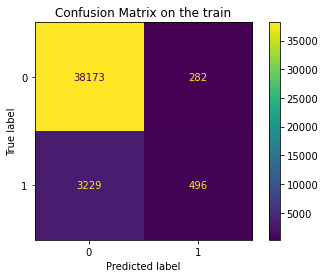

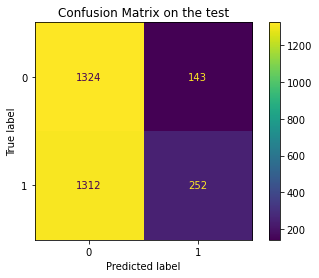

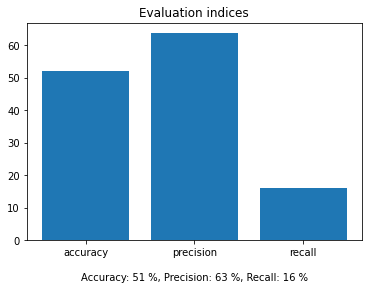

In [37]:
infile = open('discretization/all data/entropy/implemented decision tree','rb')
showData('discretization/all data/entropy/train_clean.csv', 'discretization/all data/entropy/test_clean.csv', pickle.load(infile))
infile.close()

#### KNN

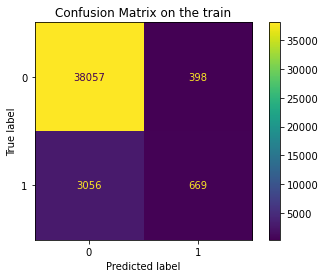

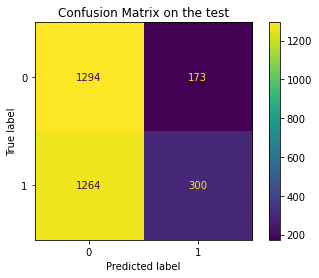

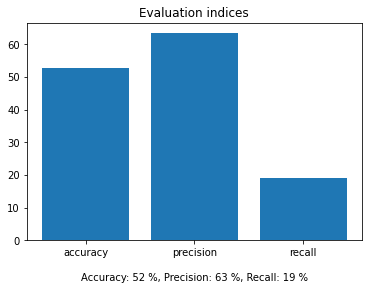

In [38]:
infile = open('discretization/all data/entropy/KNN','rb')
showData('discretization/all data/entropy/train_clean.csv', 'discretization/all data/entropy/test_clean.csv', pickle.load(infile))
infile.close()

#### Kmeans

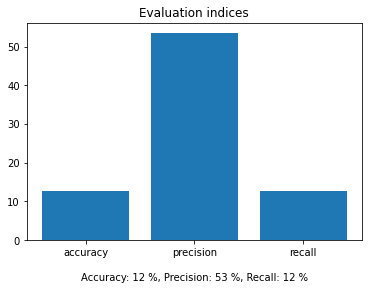

In [39]:
infile = open('discretization/all data/entropy/Kmeans','rb')
showKmeansData('discretization/all data/entropy/train_clean.csv', 'discretization/all data/entropy/test_clean.csv', pickle.load(infile))
infile.close()

## Complete Missing values by - Classification Column

### Our Equal Width - 5 bins
---

#### Our Naive Bayes

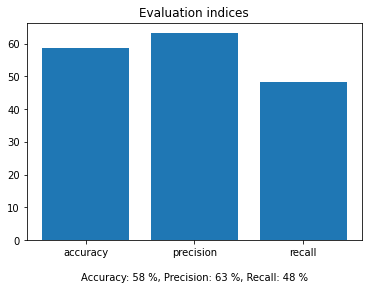

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1028   |   439    |
| Yes |   809    |   755    |
+-----+----------+----------+


In [40]:
infile = open('discretization/classification/our equal width/our naive bayes','rb')
showNaiveBaseData('discretization/classification/our equal width/train_clean.csv', 'discretization/classification/our equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented Naive Bayes

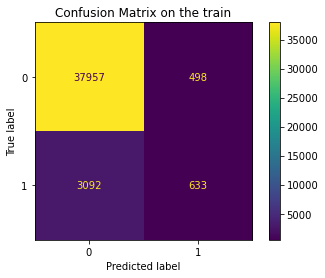

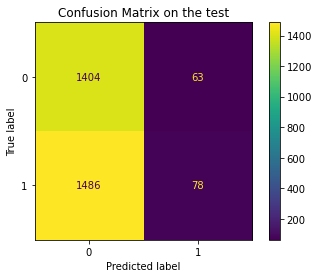

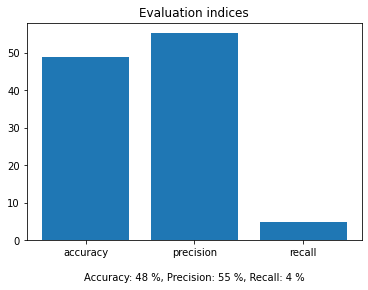

In [41]:
infile = open('discretization/classification/our equal width/implemented naive bayes','rb')
showData('discretization/classification/our equal width/train_clean.csv', 'discretization/classification/our equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Our Decision Tree

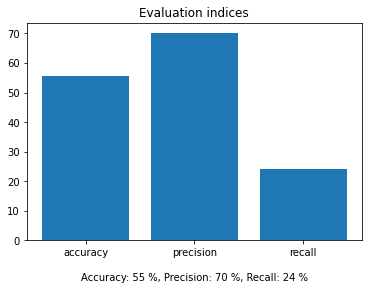

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1306   |   161    |
| Yes |   1186   |   378    |
+-----+----------+----------+


In [42]:
infile = open('discretization/classification/our equal width/our decision tree','rb')
showTreeData('discretization/classification/our equal width/train_clean.csv', 'discretization/classification/our equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented Decision Tree

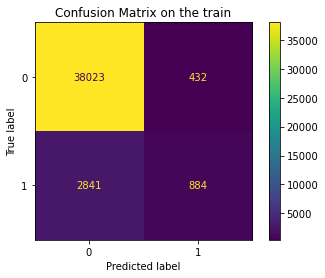

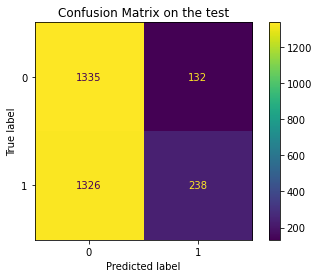

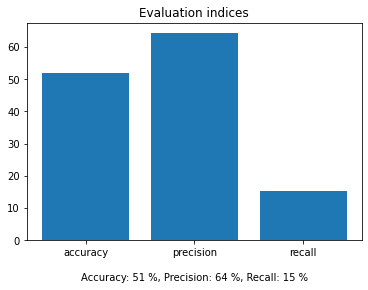

In [43]:
infile = open('discretization/classification/our equal width/implemented decision tree','rb')
showData('discretization/classification/our equal width/train_clean.csv', 'discretization/classification/our equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### KNN

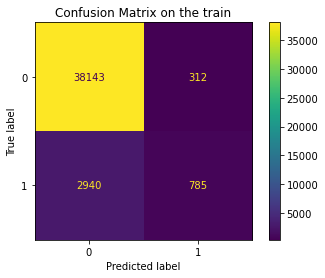

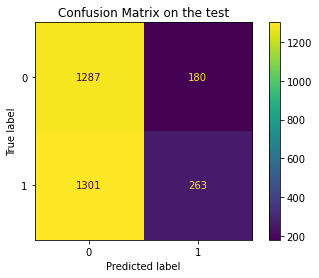

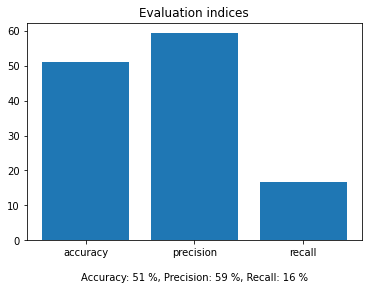

In [44]:
infile = open('discretization/classification/our equal width/KNN','rb')
showData('discretization/classification/our equal width/train_clean.csv', 'discretization/classification/our equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Kmeans

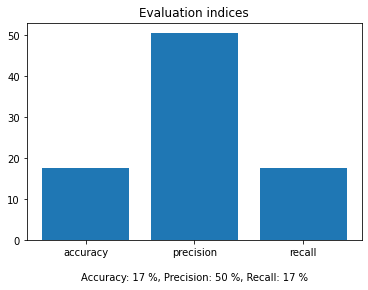

In [45]:
infile = open('discretization/classification/our equal width/Kmeans','rb')
showKmeansData('discretization/classification/our equal width/train_clean.csv', 'discretization/classification/our equal width/test_clean.csv', pickle.load(infile))
infile.close()

### Our Equal Frequency - 5 bins

#### Our Naive Bayes

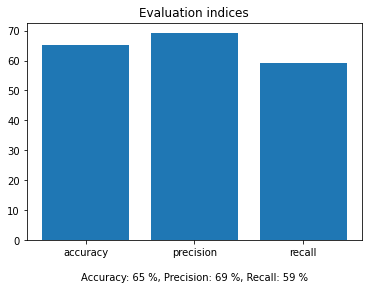

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1054   |   413    |
| Yes |   638    |   926    |
+-----+----------+----------+


In [46]:
infile = open('discretization/classification/our equal frequency/our naive bayes','rb')
showNaiveBaseData('discretization/classification/our equal frequency/train_clean.csv', 'discretization/classification/our equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented Naive Bayes

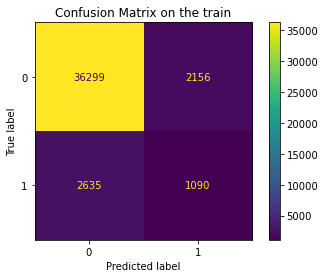

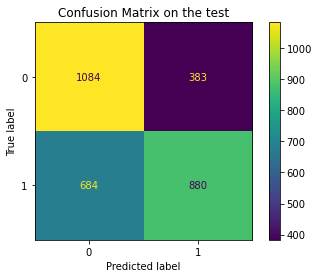

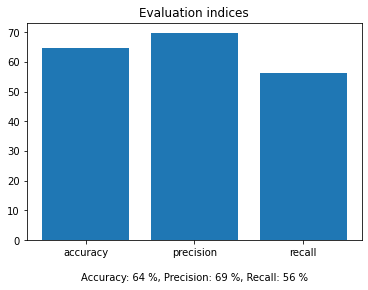

In [47]:
infile = open('discretization/classification/our equal frequency/implemented naive bayes','rb')
showData('discretization/classification/our equal frequency/train_clean.csv', 'discretization/classification/our equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Our Decision Tree

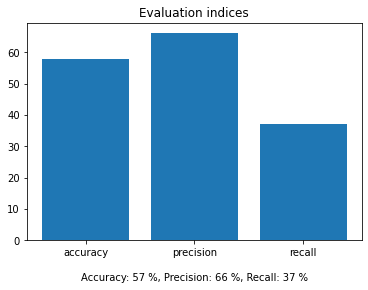

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1170   |   297    |
| Yes |   985    |   579    |
+-----+----------+----------+


In [48]:
infile = open('discretization/classification/our equal frequency/our decision tree','rb')
showTreeData('discretization/classification/our equal frequency/train_clean.csv', 'discretization/classification/our equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented Decision Tree

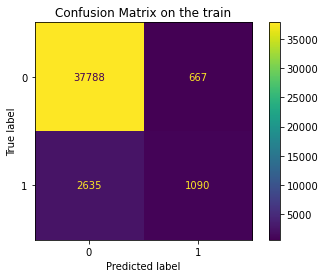

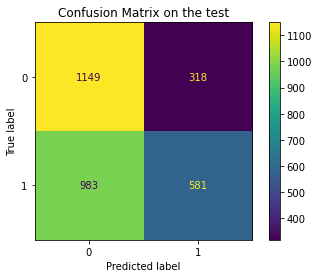

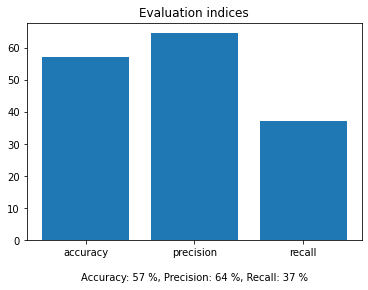

In [49]:
infile = open('discretization/classification/our equal frequency/implemented decision tree','rb')
showData('discretization/classification/our equal frequency/train_clean.csv', 'discretization/classification/our equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### KNN

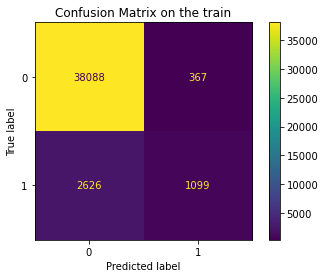

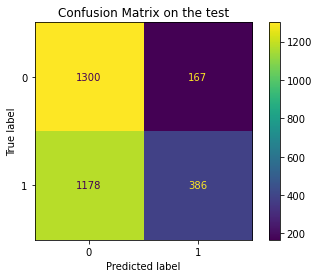

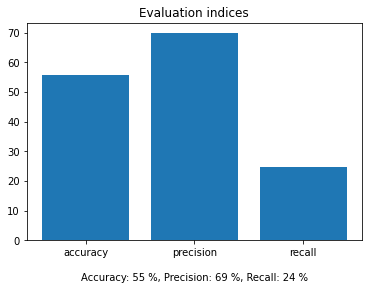

In [50]:
infile = open('discretization/classification/our equal frequency/KNN','rb')
showData('discretization/classification/our equal frequency/train_clean.csv', 'discretization/classification/our equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Kmeans

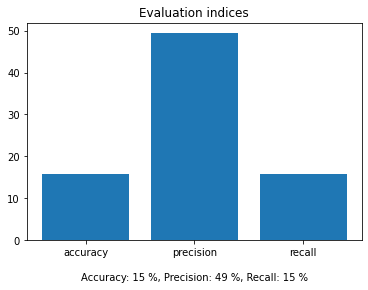

In [51]:
infile = open('discretization/classification/our equal frequency/Kmeans','rb')
showKmeansData('discretization/classification/our equal frequency/train_clean.csv', 'discretization/classification/our equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

### Implemented Equal Width - 5 bins

#### Our Naive Bayes

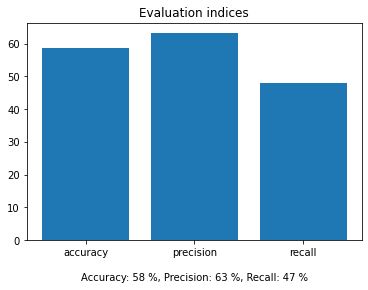

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1031   |   436    |
| Yes |   814    |   750    |
+-----+----------+----------+


In [52]:
infile = open('discretization/classification/implemented equal width/our naive bayes','rb')
showNaiveBaseData('discretization/classification/implemented equal width/train_clean.csv', 'discretization/classification/implemented equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented Naive Bayes

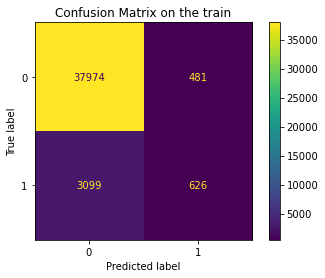

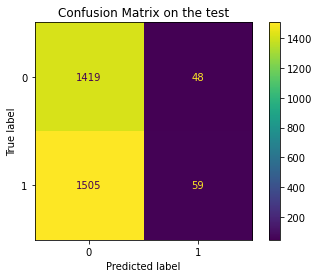

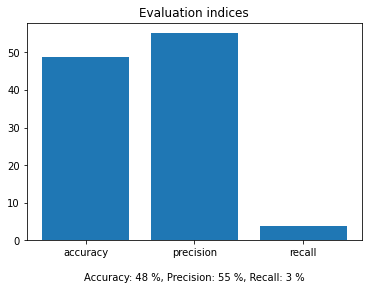

In [53]:
infile = open('discretization/classification/implemented equal width/implemented naive bayes','rb')
showData('discretization/classification/implemented equal width/train_clean.csv', 'discretization/classification/implemented equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Our Decision Tree

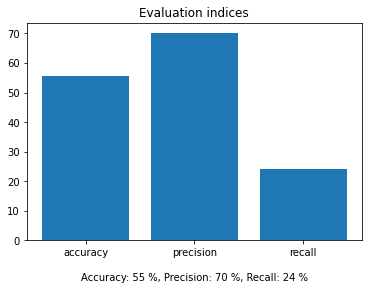

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1306   |   161    |
| Yes |   1186   |   378    |
+-----+----------+----------+


In [54]:
infile = open('discretization/classification/implemented equal width/our decision tree','rb')
showTreeData('discretization/classification/implemented equal width/train_clean.csv', 'discretization/classification/implemented equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented Decision Tree

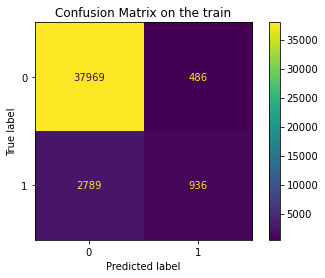

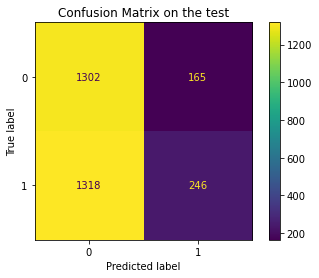

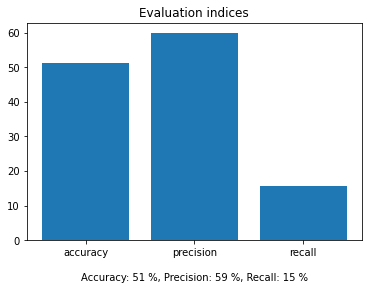

In [55]:
infile = open('discretization/classification/implemented equal width/implemented decision tree','rb')
showData('discretization/classification/implemented equal width/train_clean.csv', 'discretization/classification/implemented equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### KNN

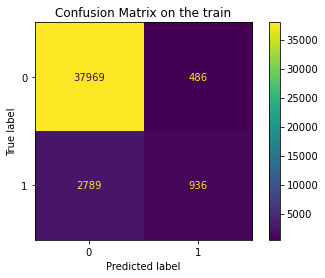

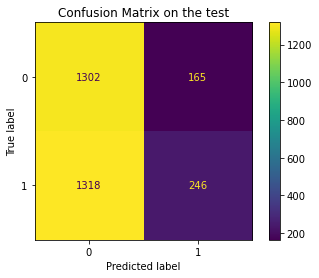

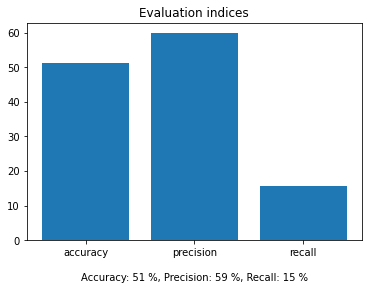

In [56]:
infile = open('discretization/classification/implemented equal width/KNN','rb')
showData('discretization/classification/implemented equal width/train_clean.csv', 'discretization/classification/implemented equal width/test_clean.csv', pickle.load(infile))
infile.close()

#### Kmeans

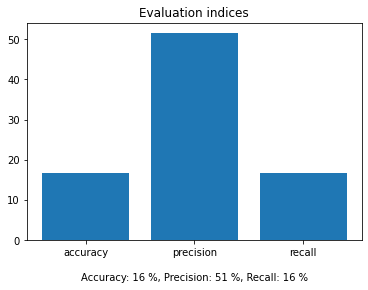

In [57]:
infile = open('discretization/classification/implemented equal width/Kmeans','rb')
showKmeansData('discretization/classification/implemented equal width/train_clean.csv', 'discretization/classification/implemented equal width/test_clean.csv', pickle.load(infile))
infile.close()

### Implemented Equal Frequency - 5 bins

#### Our Naive Bayes

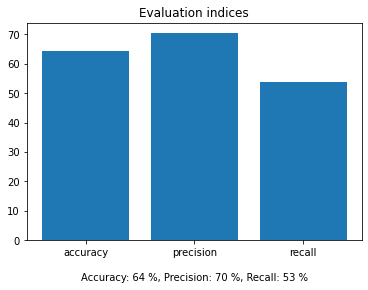

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1115   |   352    |
| Yes |   724    |   840    |
+-----+----------+----------+


In [58]:
infile = open('discretization/classification/implemented equal frequency/our naive bayes','rb')
showNaiveBaseData('discretization/classification/implemented equal frequency/train_clean.csv', 'discretization/classification/implemented equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented Naive Bayes

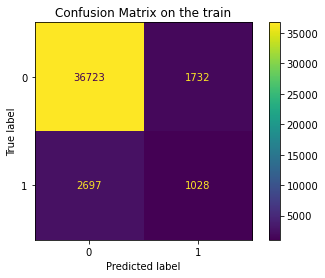

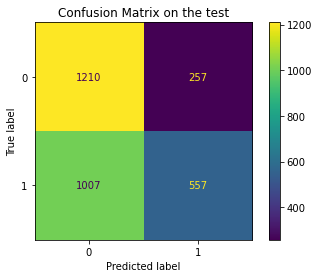

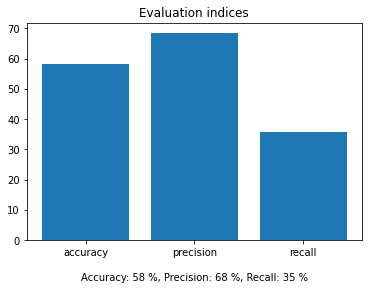

In [59]:
infile = open('discretization/classification/implemented equal frequency/implemented naive bayes','rb')
showData('discretization/classification/implemented equal frequency/train_clean.csv', 'discretization/classification/implemented equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Our Decision Tree

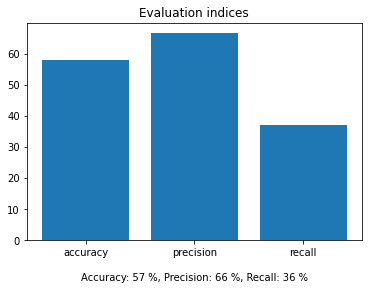

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1177   |   290    |
| Yes |   986    |   578    |
+-----+----------+----------+


In [60]:
infile = open('discretization/classification/implemented equal frequency/our decision tree','rb')
showTreeData('discretization/classification/implemented equal frequency/train_clean.csv', 'discretization/classification/implemented equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented Decision Tree

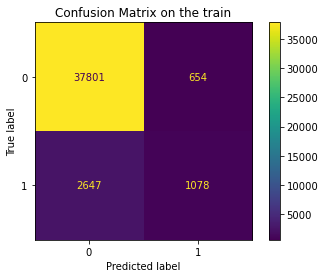

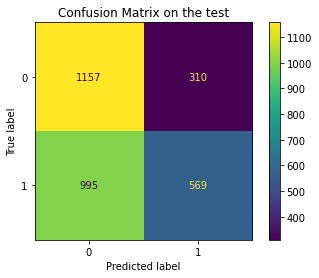

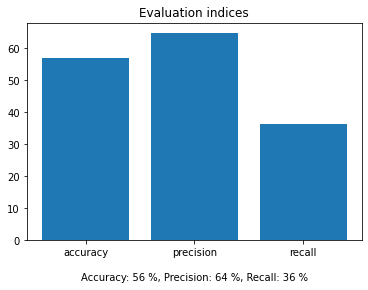

In [61]:
infile = open('discretization/classification/implemented equal frequency/implemented decision tree','rb')
showData('discretization/classification/implemented equal frequency/train_clean.csv', 'discretization/classification/implemented equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### KNN

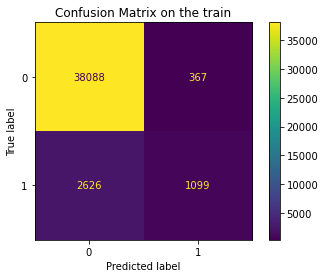

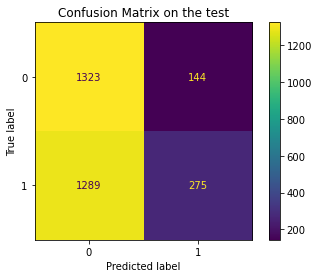

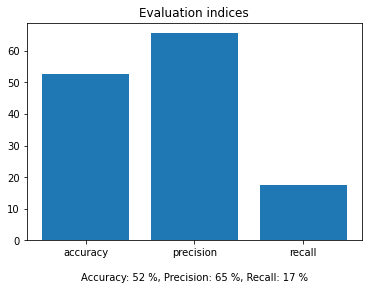

In [62]:
infile = open('discretization/classification/implemented equal frequency/KNN','rb')
showData('discretization/classification/implemented equal frequency/train_clean.csv', 'discretization/classification/implemented equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

#### Kmeans

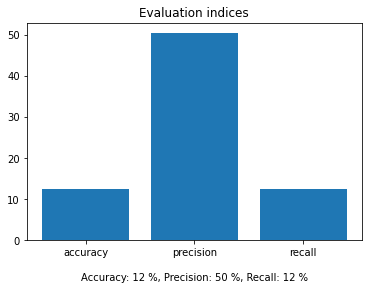

In [63]:
infile = open('discretization/classification/implemented equal frequency/Kmeans','rb')
showKmeansData('discretization/classification/implemented equal frequency/train_clean.csv', 'discretization/classification/implemented equal frequency/test_clean.csv', pickle.load(infile))
infile.close()

### Entropy - 2 bins

#### Our Naive Bayes

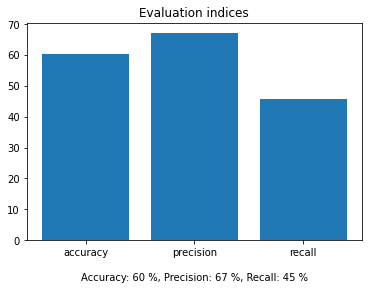

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1117   |   350    |
| Yes |   850    |   714    |
+-----+----------+----------+


In [64]:
infile = open('discretization/classification/entropy/our naive bayes','rb')
showNaiveBaseData('discretization/classification/entropy/train_clean.csv', 'discretization/classification/entropy/test_clean.csv', pickle.load(infile))
infile.close()

#### Implemented Naive Bayes

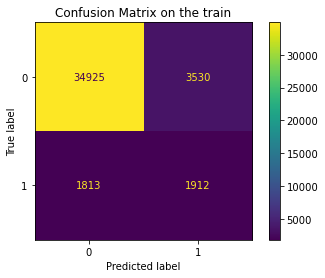

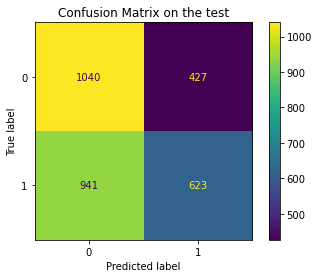

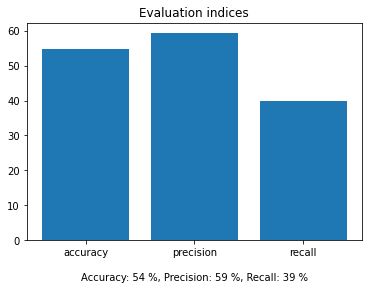

In [65]:
infile = open('discretization/classification/entropy/implemented naive bayes','rb')
showData('discretization/classification/entropy/train_clean.csv', 'discretization/classification/entropy/test_clean.csv', pickle.load(infile))
infile.close()

#### Our Decision Tree

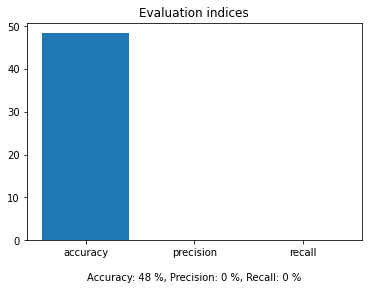

+-----+----------+----------+
|     | Negative | Positive |
+-----+----------+----------+
|  No |   1467   |    0     |
| Yes |   1564   |    0     |
+-----+----------+----------+


In [66]:
infile = open('discretization/classification/entropy/our decision tree','rb')
showTreeData('discretization/classification/entropy/train_clean.csv', 'discretization/classification/entropy/test_clean.csv', pickle.load(infile))
infile.close()

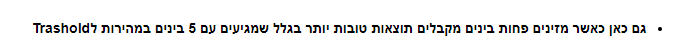

#### Implemented Decision Tree

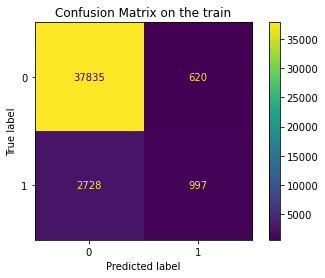

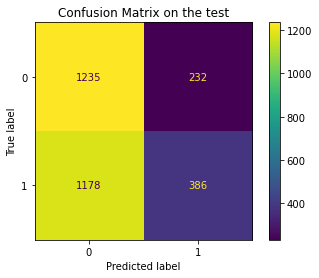

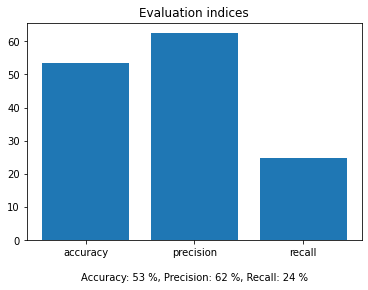

In [67]:
infile = open('discretization/classification/entropy/implemented decision tree','rb')
showData('discretization/classification/entropy/train_clean.csv', 'discretization/classification/entropy/test_clean.csv', pickle.load(infile))
infile.close()

#### KNN

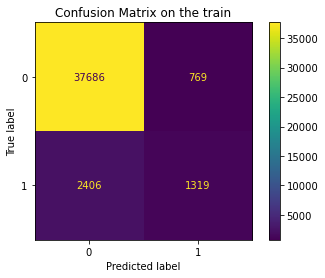

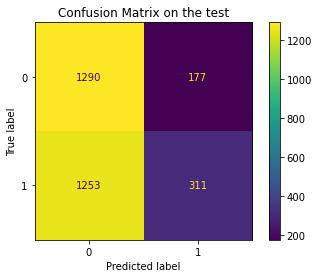

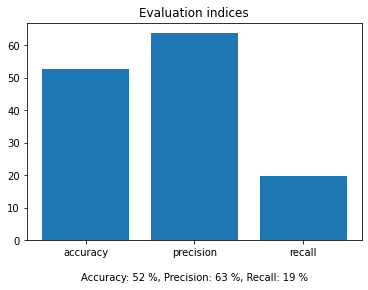

In [68]:
infile = open('discretization/classification/entropy/KNN','rb')
showData('discretization/classification/entropy/train_clean.csv', 'discretization/classification/entropy/test_clean.csv', pickle.load(infile))
infile.close()

#### Kmeans

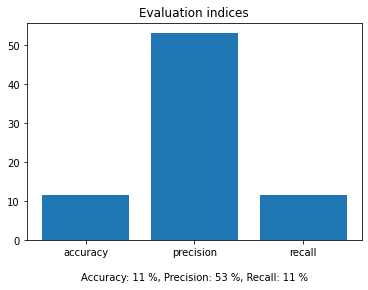

In [69]:
infile = open('discretization/classification/entropy/Kmeans','rb')
showKmeansData('discretization/classification/entropy/train_clean.csv', 'discretization/classification/entropy/test_clean.csv', pickle.load(infile))
infile.close()

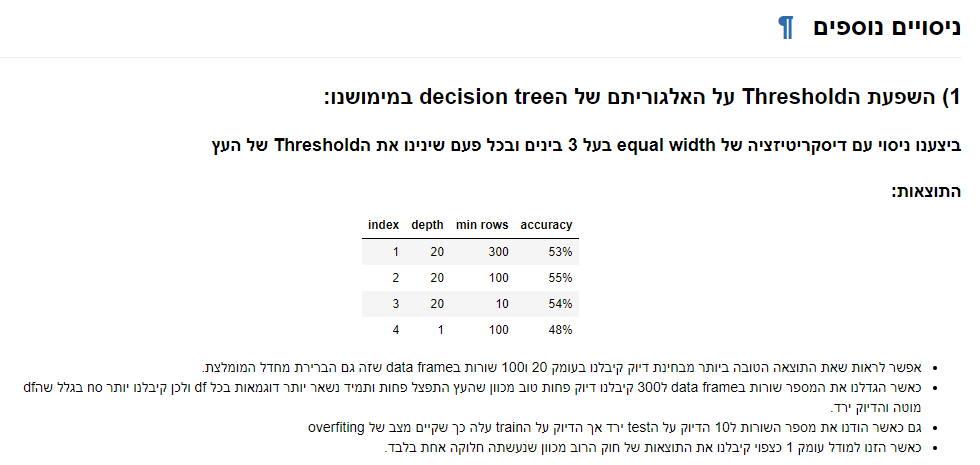
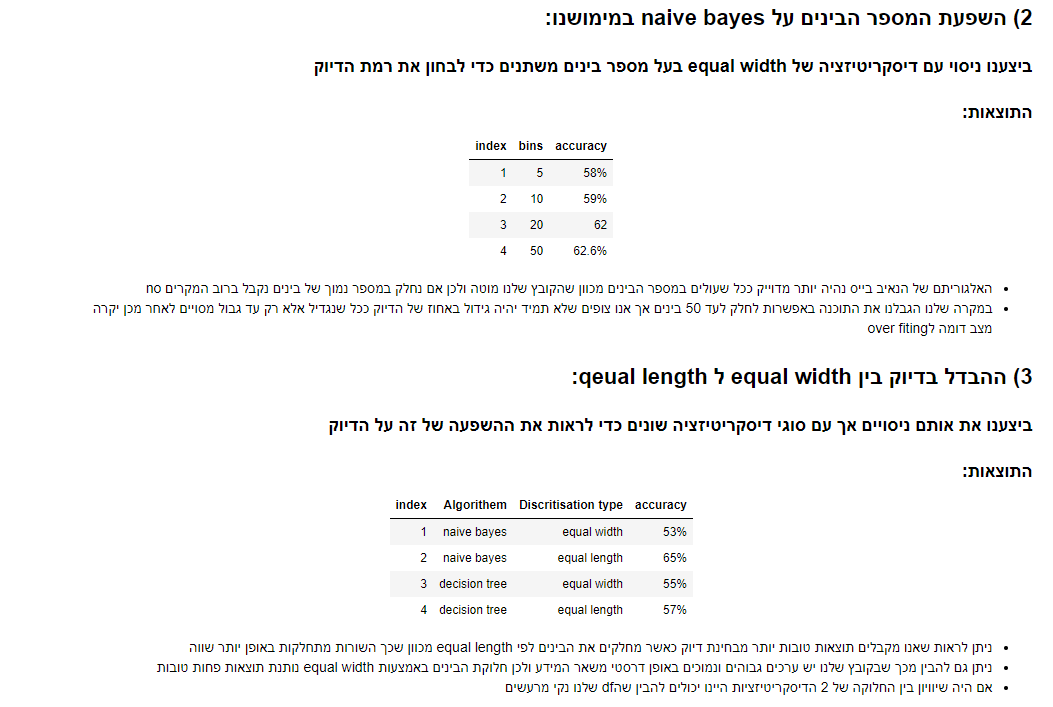
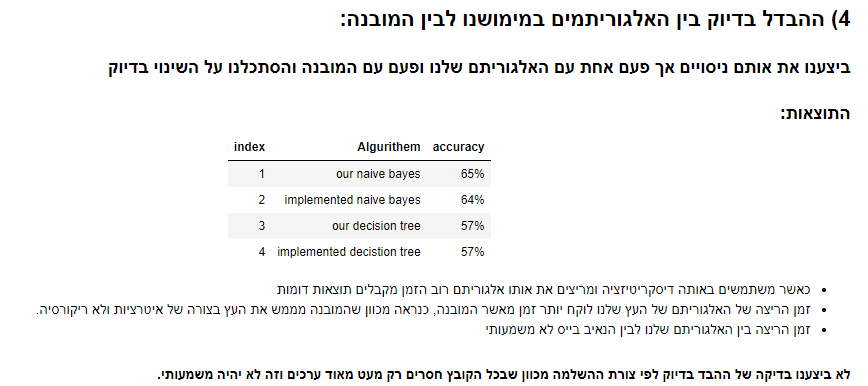

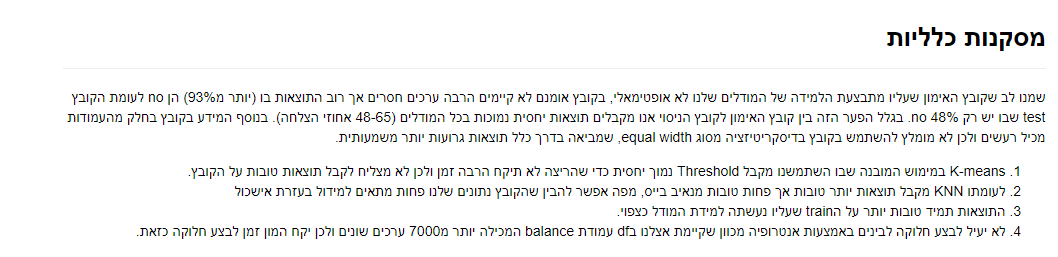